In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

C:\Users\RRC\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\RRC\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\RRC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load in the full dataset
df = pd.read_csv("FE_final_data.csv")

df.head()

,Country,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Enhance_Experience,AI_Tools_Used_Chatbots,...,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,AI_Trust,AI_Usage,KNNCluster1,KNNCluster2,LDA_Prediction,AI_Satisfaction
0,165,2,3,0,3,0,1,0,1,1,...,1,1,1,1,2,3,0,0,0,1
1,165,1,1,1,2,1,1,0,1,1,...,1,0,0,0,2,3,0,0,1,1
2,165,2,3,1,2,1,11,1,1,0,...,1,1,0,0,2,1,0,0,0,1
3,165,2,4,1,2,1,11,1,1,0,...,1,1,0,1,2,0,0,0,0,1
4,165,1,1,1,2,0,11,1,1,1,...,0,1,0,1,2,1,0,0,0,1


In [15]:
print(df["Country"].unique())


[165 245 224]


In [4]:
# Split the dataset into training and testing sets (78% - 22% split) based off of our calculations
X = df.drop(columns = ['AI_Satisfaction'])
y = df['AI_Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 3)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# This is for producing the same results
random.seed(3)

# Defining the model
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(124, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the model
model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
history = model.fit(X_train_scaled, y_train, epochs = 100, batch_size = 512, validation_split = 0.33)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8121 - loss: 0.5954 - val_accuracy: 0.8171 - val_loss: 0.5223
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8152 - loss: 0.5106 - val_accuracy: 0.8171 - val_loss: 0.4738
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8152 - loss: 0.4720 - val_accuracy: 0.8171 - val_loss: 0.4464
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8152 - loss: 0.4395 - val_accuracy: 0.8171 - val_loss: 0.4288
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8152 - loss: 0.4195 - val_accuracy: 0.8171 - val_loss: 0.4176
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8212 - loss: 0.3809 - val_accuracy: 0.8171 - val_loss: 0.4101
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8212 - loss: 0.3677 - val_accuracy: 0.8293 - val_loss: 0.4064
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8273 - loss: 0.3449 - val_accuracy: 0.8354 - val_loss: 0

Epoch 52/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9455 - loss: 0.1240 - val_accuracy: 0.7622 - val_loss: 0.6383
Epoch 53/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9455 - loss: 0.1386 - val_accuracy: 0.8171 - val_loss: 0.7330
Epoch 54/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9455 - loss: 0.1200 - val_accuracy: 0.7805 - val_loss: 0.6809
Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9697 - loss: 0.1144 - val_accuracy: 0.7805 - val_loss: 0.6931
Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9606 - loss: 0.1148 - val_accuracy: 0.8110 - val_loss: 0.7226
Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9636 - loss: 0.1079 - val_accuracy: 0.7866 - val_loss: 0.7130
Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9606 - loss: 0.1114 - val_accuracy: 0.7988 - val_loss: 0.7192
Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9818 - loss: 0.0908 - val_accuracy: 0.8171 - v

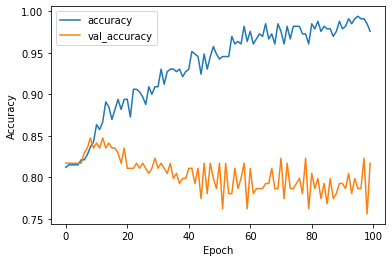

In [6]:
# Plotting the training history
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
When predicting on the test dataset, the accuracy of NN was: 87.14 %
When predicting on the test dataset, the recall of NN was: 96.61 %
When predicting on the test dataset, the precision of NN was: 89.06 %
When predicting on the test dataset, the F1 of NN was: 92.68 %
When predicting on the test dataset, the specificity of NN was: 36.36 %


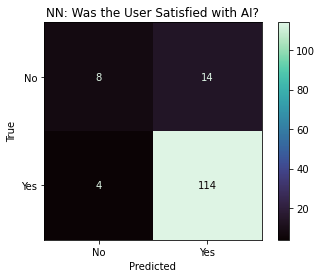

In [7]:
# Predicting on the test set
predictions = model.predict(X_test_scaled)
predicted_class = (predictions >= 0.5).astype(int)

# Displaying the Confusion Matrix 
cf_matrix = confusion_matrix(y_test, predicted_class)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['No', 'Yes'])
cmd.plot(cmap = 'mako')
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True', title = 'NN: Was the User Satisfied with AI?')

# Printing results
print("When predicting on the test dataset, the accuracy of NN was:", np.round((accuracy_score(y_test, predicted_class) * 100), 2), "%")
print("When predicting on the test dataset, the recall of NN was:", np.round((recall_score(y_test, predicted_class) * 100), 2), "%")
print("When predicting on the test dataset, the precision of NN was:", np.round((precision_score(y_test, predicted_class) * 100), 2), "%")
print("When predicting on the test dataset, the F1 of NN was:", np.round((f1_score(y_test, predicted_class) * 100), 2), "%")
print("When predicting on the test dataset, the specificity of NN was:", np.round((recall_score(y_test, predicted_class, pos_label = 0) * 100), 2), "%")


In [8]:
# This is to try and stop the NN from overfitting
random.seed(3)

# Performing PCA on the training features.
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Creating a new model for PCA-reduced data and adding a early dropout to see if the model's accuracy will increase.
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_dim = X_train_pca.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(124, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(12, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))


In [9]:
# Compile the second model
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

# Fit the second model with early stopping
history_pca = model2.fit(X_train_pca, y_train, epochs = 100, batch_size = 512,
                         validation_split = 0.33, callbacks = [early_stopping])



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step - accuracy: 0.7939 - loss: 0.5995 - val_accuracy: 0.8171 - val_loss: 0.5269
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8030 - loss: 0.5288 - val_accuracy: 0.8171 - val_loss: 0.4896
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8091 - loss: 0.4810 - val_accuracy: 0.8171 - val_loss: 0.4567
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8152 - loss: 0.4347 - val_accuracy: 0.8171 - val_loss: 0.4369
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8182 - loss: 0.4261 - val_accuracy: 0.8171 - val_loss: 0.4249
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8121 - loss: 0.4115 - val_accuracy: 0.8171 - val_loss: 0.4107
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8212 - loss: 0.3811 - val_accuracy: 0.8354 - val_loss: 0.4026
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8303 - loss: 0.3717 - val_accuracy: 0.8598 - val_loss

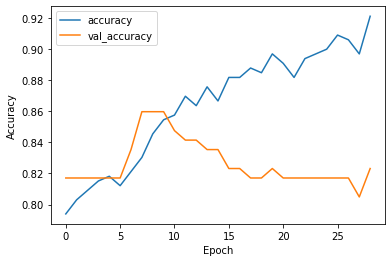

In [10]:
# Plot training history for PCA model
plt.plot(history_pca.history['accuracy'], label='accuracy')
plt.plot(history_pca.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
When predicting on the test dataset, the accuracy of NN was: 86.43 %
When predicting on the test dataset, the recall of NN was: 98.31 %
When predicting on the test dataset, the precision of NN was: 87.22 %
When predicting on the test dataset, the F1 of NN was: 92.43 %
When predicting on the test dataset, the specificity of NN was: 22.73 %


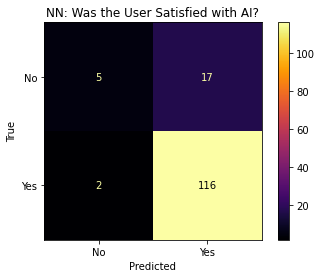

In [11]:
# Predict on the test set using PCA-reduced data
predictions_pca = model2.predict(X_test_pca)
predicted_class_pca = (predictions_pca >= 0.5).astype(int)

# Displaying the Confusion Matrix 
cf_matrix = confusion_matrix(y_test, predicted_class_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['No', 'Yes'])
cmd.plot(cmap = 'inferno')
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True', title = 'NN: Was the User Satisfied with AI?')

# Printing results
print("When predicting on the test dataset, the accuracy of NN was:", np.round((accuracy_score(y_test, predicted_class_pca) * 100), 2), "%")
print("When predicting on the test dataset, the recall of NN was:", np.round((recall_score(y_test, predicted_class_pca) * 100), 2), "%")
print("When predicting on the test dataset, the precision of NN was:", np.round((precision_score(y_test, predicted_class_pca) * 100), 2), "%")
print("When predicting on the test dataset, the F1 of NN was:", np.round((f1_score(y_test, predicted_class_pca) * 100), 2), "%")
print("When predicting on the test dataset, the specificity of NN was:", np.round((recall_score(y_test, predicted_class_pca, pos_label = 0) * 100), 2), "%")


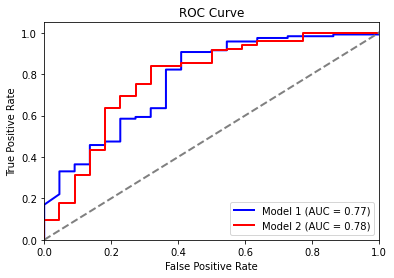

In [12]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

fpr_pca, tpr_pca, _ = roc_curve(y_test, predictions_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curves
plt.figure()
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'Model 1 (AUC = {roc_auc:.2f})')
plt.plot(fpr_pca, tpr_pca, color='red', lw = 2, label = f'Model 2 (AUC = {roc_auc_pca:.2f})')
plt.plot([0, 1], [0, 1], color = 'gray', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

In [14]:
# !pip install shap

In [27]:
# ipywidgets

# !pip install ipywidgets

# this will allow the notebook to reload/refresh automatically within the runtime
%reload_ext autoreload
%autoreload 2

import ipywidgets

In [28]:
import shap


In [13]:
print(y_test.shape)
print(predicted_class_pca.shape)



(140,)
(140, 1)


In [20]:
# y_test = y_test.flatten()  
predicted_class_pca = predicted_class_pca.flatten()

In [21]:
print(y_test.shape)
print(predicted_class_pca.shape)


(140,)
(140,)


In [23]:
# Ensure you use the PCA-reduced features
explainer = shap.KernelExplainer(model2.predict, X_train_pca)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_pca)




16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Using 494 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/140 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 22s 667us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 23s 707us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 22s 687us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 23s 720us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 22s 691us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 23s 718us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 22s 693us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 25s 774us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 24s 730us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 22s 687us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 23s 706us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
32234/32234 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 23s 711us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 23s 719us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 21s 664us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 21s 665us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 23s 701us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 21s 664us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 21s 652us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 21s 656us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 22s 689us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 21s 653us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32234/32234 ━━━━━━━━━━━━━━━━━━━━ 21s 647us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32234/32234 ━━━━

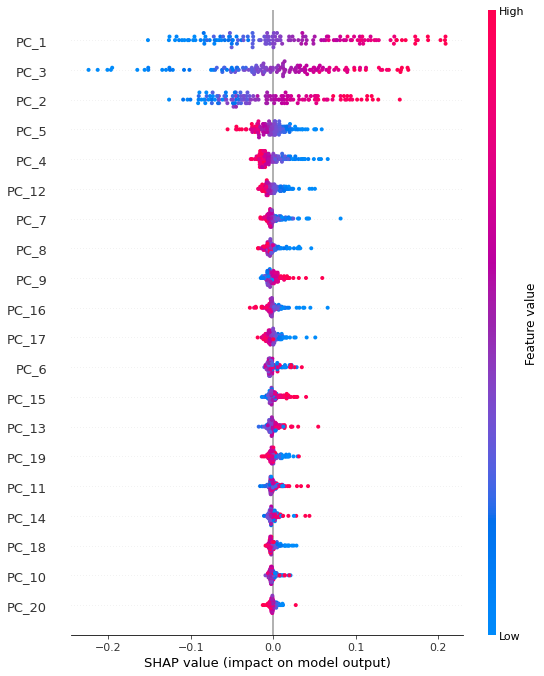

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

X_train_pca_df = pd.DataFrame(X_train_pca)
X_train_pca_df.columns = [f'PC_{i+1}' for i in range(X_train_pca_df.shape[1])]
PCA_column_names = X_train_pca_df.columns.tolist()

X_test_pca_df = pd.DataFrame(X_test_pca, columns = PCA_column_names)

shap_values_flat = shap_values.reshape(140, 20)

shap.summary_plot(shap_values_flat, X_test_pca_df, feature_names=PCA_column_names)







In [ ]:
The High feature values are shown in Red, High values are in red, low values are in blue

The variables at the top of the plot are the most important, those at the bottom of the plot are the least important

Looking at the plot below

High BMI increases the output, and appears to be the dominant factor in the progression of diabetes

The second most important term is sex, low sex values increase the rate, higher decrease it. Sex has only two values, so it is some sort of binary coding, but we don't have a good data dictionary

S5 is a diagnostic test,

Higher age increase the progression of diabetes, as does higher blood pressure

Question
Based on the SHAP plot above Which variables have a positive correlation with the progression of diabetes?

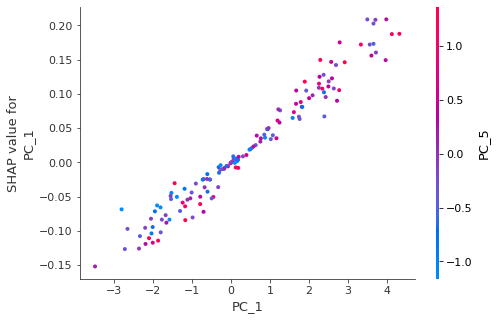

In [49]:
shap.dependence_plot(0, shap_values_flat, X_test_pca_df, feature_names = PCA_column_names)

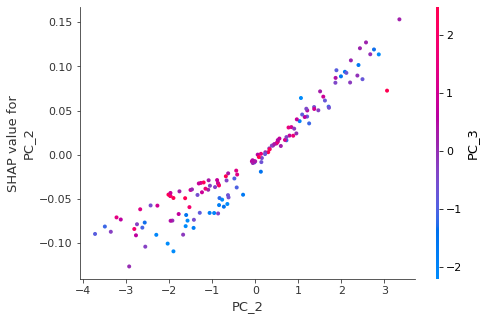

In [51]:
shap.dependence_plot(1, shap_values_flat, X_test_pca_df, feature_names=PCA_column_names)

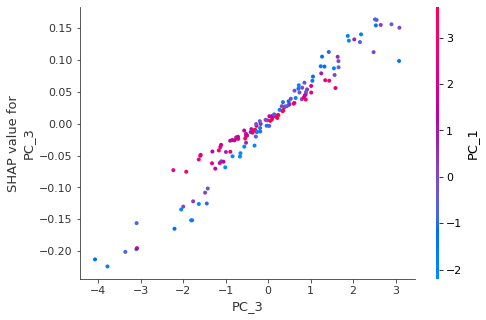

In [50]:
shap.dependence_plot(2, shap_values_flat, X_test_pca_df, feature_names=PCA_column_names)

In [ ]:
# Since PCA was done it is hard to see which feature was used, so we will do it on the inital model and say that
# these features were included in the PCA when they were being created

In [23]:
#y_test = y_test.flatten()  
predictions = predictions.flatten()

In [25]:
print(y_test.shape)
print(predictions.shape)


(140,)
(140,)


In [29]:
# Ensure you use the PCA-reduced features
explainer2 = shap.KernelExplainer(model.predict, X_train_scaled)

# Calculate SHAP values
shap_values2 = explainer2.shap_values(X_test_scaled)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


Using 494 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/140 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 541us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 17s 536us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 550us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 544us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 544us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 19s 585us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 548us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 563us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 565us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 566us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 19s 573us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 545us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 541us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 549us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 561us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 17s 537us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 551us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 545us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 552us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 545us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 558us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32357/32357 ━━━━━━━━━━━━━━━━━━━━ 18s 547us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32357/32357 ━━━━

In [34]:
shap_values2.shape

(140, 24, 1)

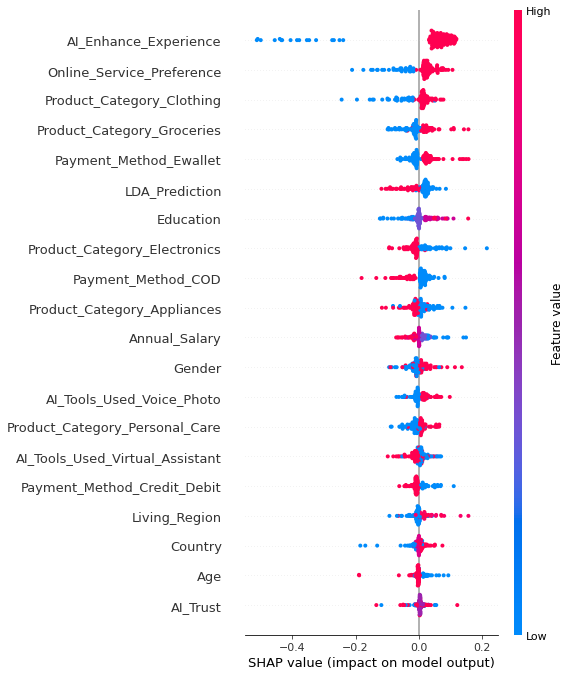

In [41]:
import matplotlib.pyplot as plt
fig2 = plt.figure(figsize = (10,10))

shap_X_train_df = pd.DataFrame(X_train_scaled)
Model_column_names = X_train.columns.tolist()

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = Model_column_names)

shap_values_flat2 = shap_values2.reshape(140, 24)

shap.summary_plot(shap_values_flat2, X_test_scaled, feature_names=Model_column_names)


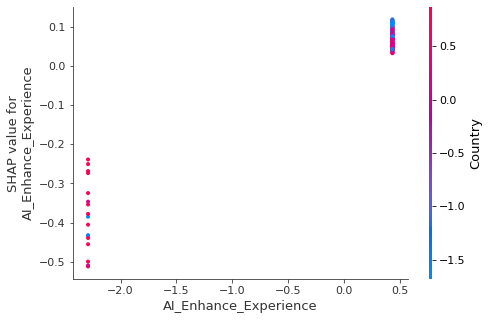

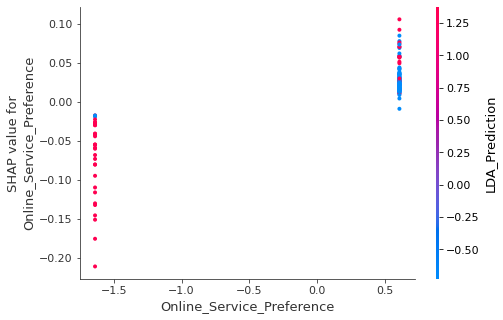

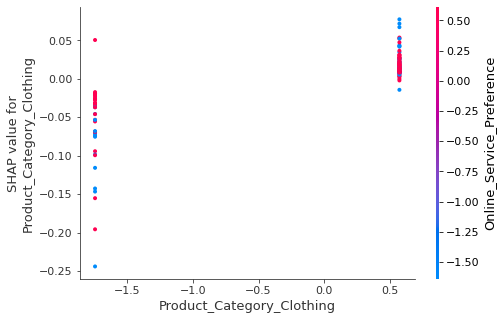

In [50]:
shap.dependence_plot(8, shap_values_flat2, X_test_scaled_df, feature_names = Model_column_names)
shap.dependence_plot(7, shap_values_flat2, X_test_scaled_df, feature_names = Model_column_names)
shap.dependence_plot(18, shap_values_flat2, X_test_scaled_df, feature_names = Model_column_names)